In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates

%matplotlib inline

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
raw_data = pd.read_csv('./data/raw_data.csv')

data = raw_data.copy()
var_list = data.columns[2:]
for var in var_list:
    data.loc[:, var] = data.loc[:, var].str.strip("%").astype(float)

data.loc[:, 'observation_date'] = pd.to_datetime(data.loc[:, 'observation_date'], format="%Y-%m-%d")

In [3]:
data

,observation_date,CPIAUCNS,GS10,GS5,GS30,GS2,GS1M,GS20,GS3M,GS3,FII5,GS7,FII30,GS1,GS5-FII5
0,1953-04-01,26.600,2.83,2.62,NaN,NaN,NaN,3.08,NaN,2.51,NaN,NaN,NaN,2.36,NaN
1,1953-05-01,26.700,3.05,2.87,NaN,NaN,NaN,3.18,NaN,2.72,NaN,NaN,NaN,2.48,NaN
2,1953-06-01,26.800,3.11,2.94,NaN,NaN,NaN,3.21,NaN,2.74,NaN,NaN,NaN,2.45,NaN
3,1953-07-01,26.800,2.93,2.75,NaN,NaN,NaN,3.12,NaN,2.62,NaN,NaN,NaN,2.38,NaN
4,1953-08-01,26.900,2.95,2.80,NaN,NaN,NaN,3.10,NaN,2.58,NaN,NaN,NaN,2.28,NaN
5,1953-09-01,26.900,2.87,2.71,NaN,NaN,NaN,3.07,NaN,2.56,NaN,NaN,NaN,2.20,NaN
6,1953-10-01,27.000,2.66,2.43,NaN,NaN,NaN,2.95,NaN,2.23,NaN,NaN,NaN,1.79,NaN
7,1953-11-01,26.900,2.68,2.42,NaN,NaN,NaN,2.95,NaN,2.20,NaN,NaN,NaN,1.67,NaN
8,1953-12-01,26.900,2.59,2.32,NaN,NaN,NaN,2.89,NaN,2.07,NaN,NaN,NaN,1.66,NaN
9,1954-01-01,26.900,2.48,2.17,NaN,NaN,NaN,2.80,NaN,1.89,NaN,NaN,NaN,1.41,NaN


In [4]:
data.to_csv('./processed_data.csv', index=False)

In [5]:
data = data.set_index('observation_date')

In [6]:
var_list

Index(['GS10', 'GS5', 'GS30', 'GS2', 'GS1M', 'GS20', 'GS3M', 'GS3', 'FII5',
       'GS7', 'FII30', 'GS1', 'GS5-FII5'],
      dtype='object')

In [35]:
len(var_list)

13

In [7]:
print('   Total - %d Rows' % (len(data)))
for i, var in enumerate(var_list):
    num_nan = len(data[data[var].isnull()])
    print('%8s - %3d missing' % (var, num_nan))

   Total - 775 Rows
    GS10 -   0 missing
     GS5 -   0 missing
    GS30 - 333 missing
     GS2 - 278 missing
    GS1M - 579 missing
    GS20 -  81 missing
    GS3M - 345 missing
     GS3 -   0 missing
    FII5 - 597 missing
     GS7 - 195 missing
   FII30 - 682 missing
     GS1 -   0 missing
GS5-FII5 - 597 missing


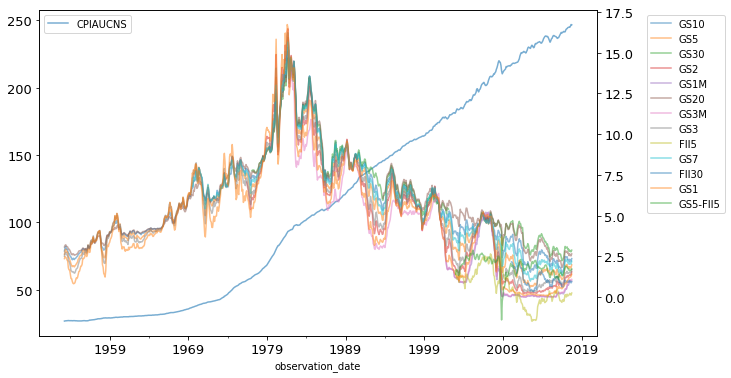

In [8]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

data.iloc[:, 0].plot(ax=ax1, alpha=0.6)
data.iloc[:, 1:].plot(ax=ax2, alpha=0.5)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

## Plotting deltas

In [9]:
for i, col in enumerate(data.columns):
    label = col + '_delta1'
    data[label] = data[col] - data[col].shift(1)

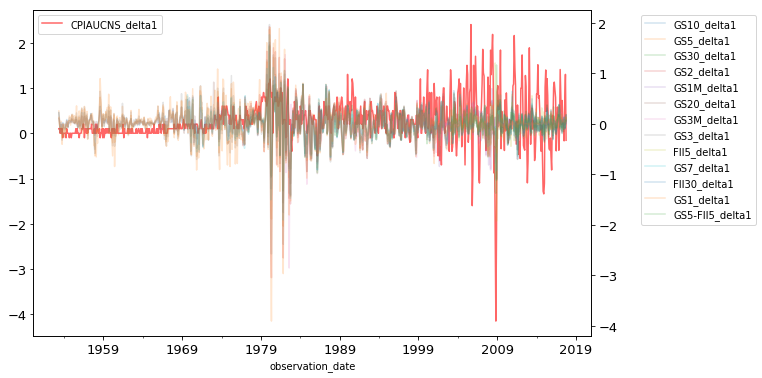

In [16]:
delta1_cols = [col for col in data.columns if '_delta1' in col]
delta1s = data[delta1_cols]

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

delta1s.iloc[:, 0].plot(ax=ax1, alpha=0.6, color='r')
delta1s.iloc[:, 1:].plot(ax=ax2, alpha=0.2)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

## Pearson Correlation

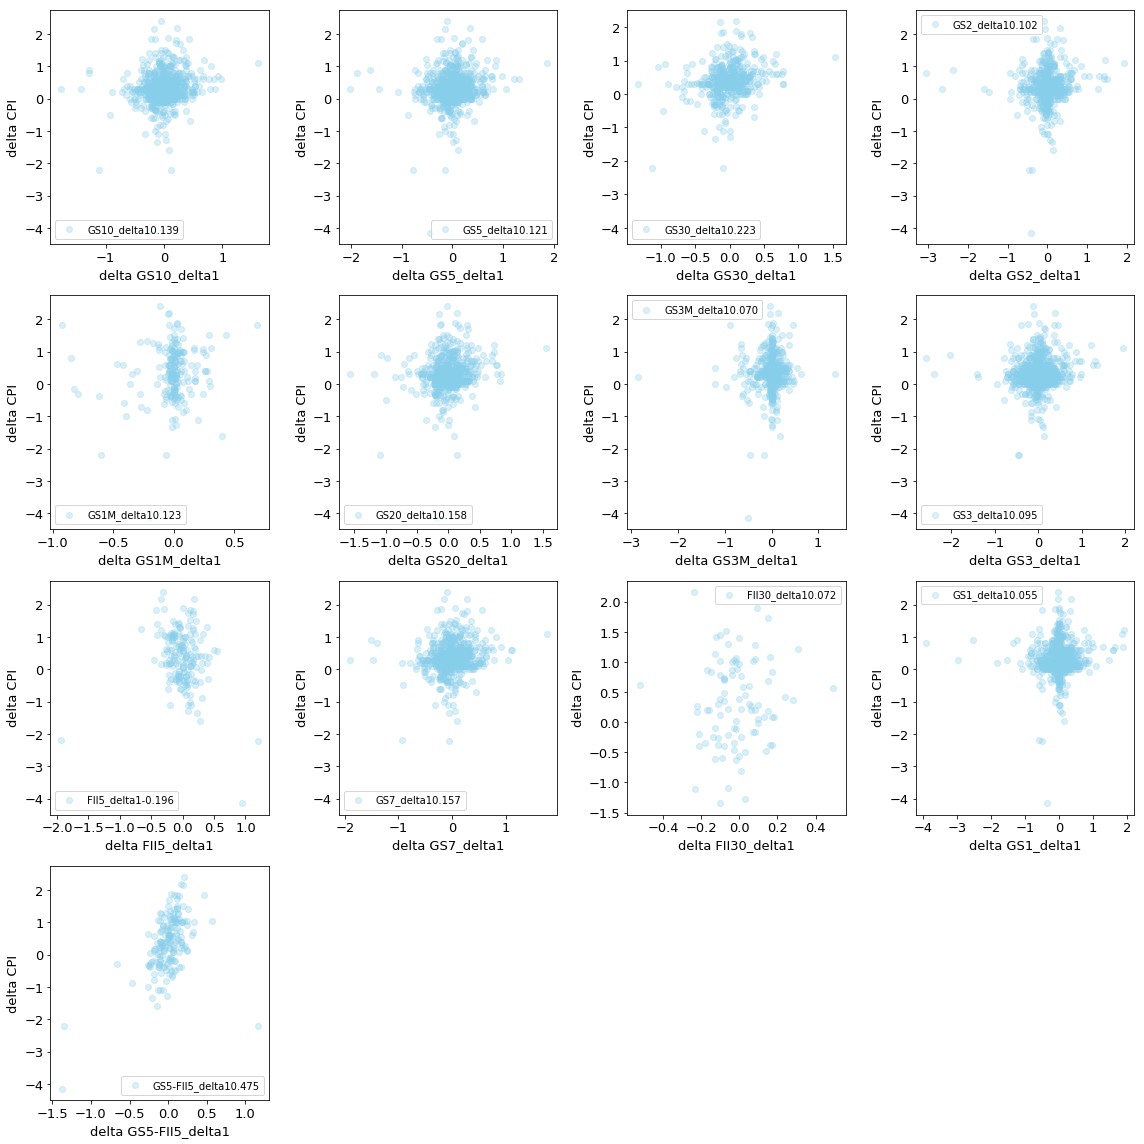

In [51]:
delta1_cols = [col for col in data.columns if '_delta1' in col]
delta1s = data[delta1_cols]

fig = plt.figure(figsize=(16, 16))

for i, col in enumerate(delta1_cols[1:]):
    x = delta1s[col]
    y = delta1s.iloc[:, 0]
    corr = x.corr(y)
    
    ax = fig.add_subplot(4, 4, i+1)
    label = col + ('%.3f' % corr)
    ax.scatter(x, y, color='skyblue', alpha=0.3, label=label)
    ax.set_xlabel('delta %s' % col, fontsize=13)
    ax.set_ylabel('delta CPI', fontsize=13)
    ax.legend()
    for tick in ax.get_xticklabels():
        tick.set_fontsize(13)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(13)
    
plt.tight_layout()

In [33]:
correlations

,pearson_correlation
FII30_delta1,0.071667
FII5_delta1,-0.195658
GS10_delta1,0.138835
GS1M_delta1,0.122859
GS1_delta1,0.054638
GS20_delta1,0.158372
GS2_delta1,0.101588
GS30_delta1,0.223197
GS3M_delta1,0.069674
GS3_delta1,0.095007
